In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.utils import class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Load the data
data = pd.read_csv('final_dataframe.csv')
data

,Unnamed: 0,participant,trial,onset_ms,difficulty,correctResponse,participantResponse,RT,errorLR,isComission,isOmission,time_ms,ECG,filtered_ecg,normalized_ecg,RR_intervals,Heart_Rate,HRV,RMSSD,SDNN
0,1,1,3,11342,0,0,0,0.395806,0,NaN,0.0,11342,-172.5,-15.836893,-0.058880,2.798,21.443888,7.828,7.828,2.515000
1,2,1,11,21968,0,1,1,0.687468,0,NaN,0.0,21968,154.0,-48.734000,-0.183536,10.626,5.646527,-2.750,2.750,4.320176
2,3,1,15,27046,0,2,1,0.534686,0,NaN,0.0,27046,179.5,-91.812792,-0.346774,5.078,11.815675,3.946,3.946,3.784834
3,4,1,16,28242,1,0,0,0.638847,0,NaN,0.0,28242,163.5,-103.752097,-0.445721,1.196,50.167224,-2.336,2.336,3.992489
4,5,1,17,29852,1,0,0,0.798577,0,NaN,0.0,29852,207.0,-103.752097,-0.392016,1.610,37.267081,5.426,5.426,3.874637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3979,3980,9,492,712734,1,0,0,0.541629,0,NaN,0.0,712734,-290.0,101.858347,0.387101,4.040,14.851485,446.740,446.740,990.523787
3980,3981,9,494,715244,1,0,0,0.458256,0,NaN,0.0,715244,-36.0,25.407515,0.097407,2.510,23.904382,-444.098,444.098,990.424418
3981,3982,9,496,717886,1,1,1,0.506915,0,NaN,0.0,717886,51.0,-15.012882,-0.055757,2.642,22.710068,445.196,445.196,990.325192
3982,3983,9,497,718984,0,0,0,0.374999,0,NaN,0.0,718984,-18.5,-15.012882,-0.096331,1.098,54.644809,-441.588,441.588,990.225622


In [3]:
# Define independent variables and target variable
features = ['filtered_ecg', 'normalized_ecg', 'RR_intervals', 'Heart_Rate', 'HRV', 'RMSSD', 'SDNN']
target = 'RT'

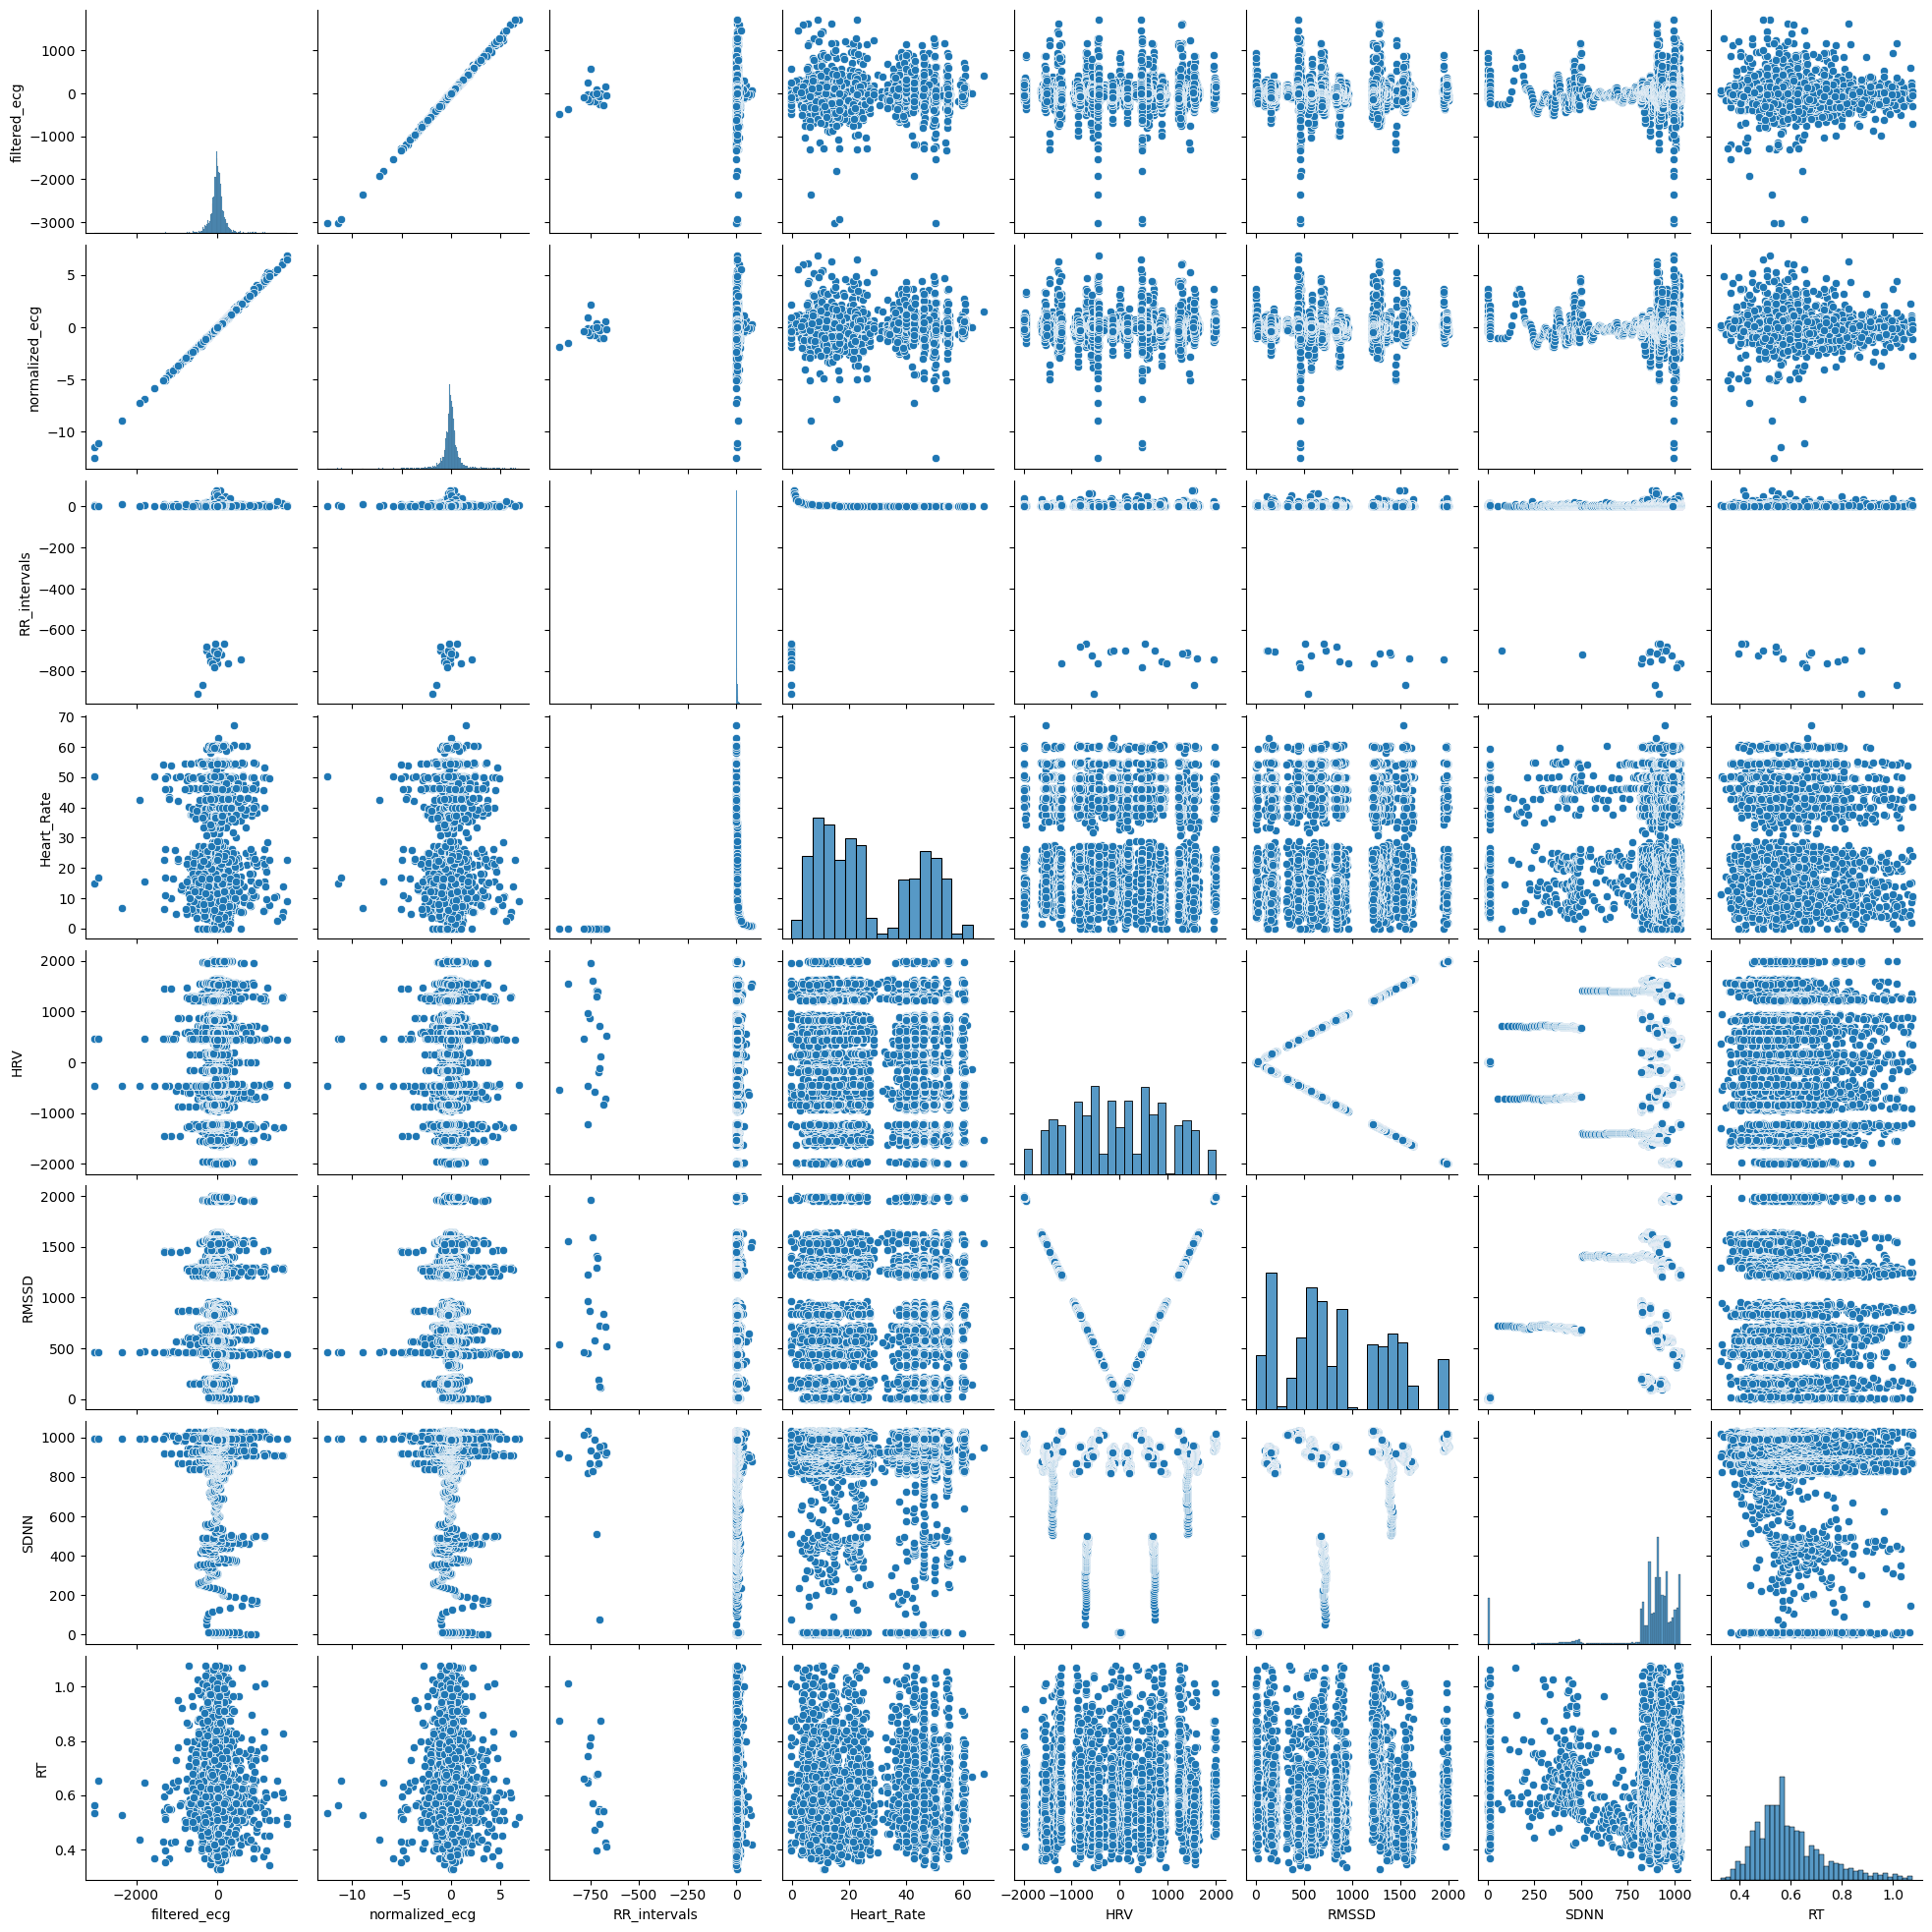

In [4]:
# EDA and Visualization
sns.pairplot(data[features + [target]])
plt.show()

In [5]:
# Prepare feature matrix X and target vector y
X = data[features]
y = data[target]

In [6]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Feature scaling - standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_predictions)

In [9]:
# Train a Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(X_train_scaled, y_train)
rf_predictions = rf_regressor.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, rf_predictions)

In [10]:
# Train a Gradient Boosting model
gb_regressor = GradientBoostingRegressor(random_state=42)
gb_regressor.fit(X_train_scaled, y_train)
gb_predictions = gb_regressor.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_predictions)

In [11]:
# Print Mean Squared Errors
print("Linear Regression MSE:", linear_mse)
print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)

Linear Regression MSE: 0.01871208755617276
Random Forest MSE: 0.017010062357685176
Gradient Boosting MSE: 0.016392891908281484


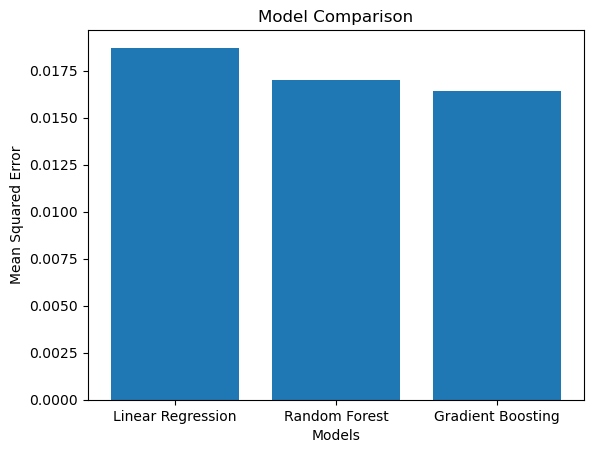

In [12]:
# Model Comparison Visualization
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting']
mse_scores = [linear_mse, rf_mse, gb_mse]
plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.show()

In [13]:
# Train a Neural Network model
nn_model = Sequential()
nn_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dropout(0.5))
nn_model.add(Dense(1))
nn_model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
# Early stopping callback for NN
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [15]:
# Train the Neural Network model
history_nn = nn_model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, validation_split=0.2,
                          callbacks=[early_stopping])

Epoch 1/100
40/40 [==============================] - 1s 11ms/step - loss: 0.5171 - val_loss: 0.0957
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.2842 - val_loss: 0.0697
Epoch 3/100
40/40 [==============================] - 0s 7ms/step - loss: 0.2142 - val_loss: 0.0627
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1300 - val_loss: 0.0632
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1278 - val_loss: 0.0610
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.1019 - val_loss: 0.0536
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0837 - val_loss: 0.0541
Epoch 8/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0804 - val_loss: 0.0480
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0662 - val_loss: 0.0472
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0625 - val_loss: 0.0469
Epoch 11

40/40 [==============================] - 0s 7ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 84/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.0178
Epoch 85/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.0179
Epoch 86/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0179
Epoch 87/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0174 - val_loss: 0.0179
Epoch 88/100
40/40 [==============================] - 0s 6ms/step - loss: 0.0172 - val_loss: 0.0179
Epoch 89/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0173 - val_loss: 0.0179
Epoch 90/100
40/40 [==============================] - 0s 7ms/step - loss: 0.0174 - val_loss: 0.0179
Epoch 91/100
40/40 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0178
Epoch 92/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0172 - val_loss: 0.0178
Epoch 93/100


In [16]:
# Evaluate the Neural Network model
test_loss_nn = nn_model.evaluate(X_test_scaled, y_test)
print("Neural Network Test Loss:", test_loss_nn)

25/25 [==============================] - 0s 2ms/step - loss: 0.0187
Neural Network Test Loss: 0.018685778602957726


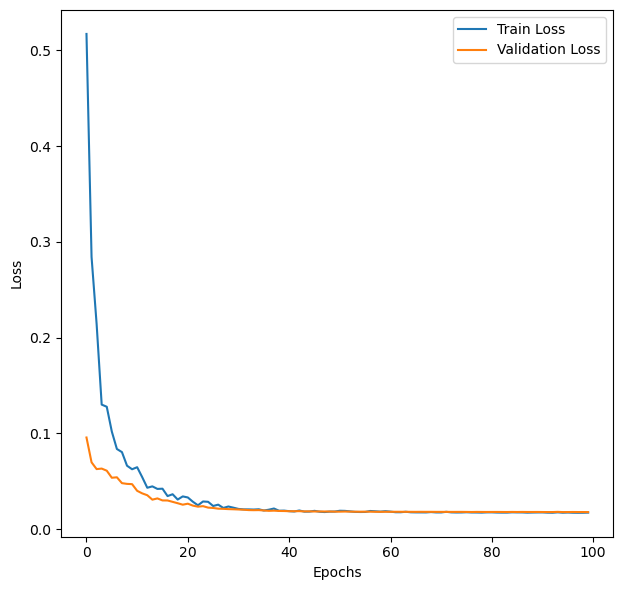

In [17]:
# Plot training history for Neural Network
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_nn.history['loss'], label='Train Loss')
plt.plot(history_nn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Evaluate the Neural Network model
test_loss_nn = nn_model.evaluate(X_test_scaled, y_test)
print("Neural Network Test Loss (MSE):", test_loss_nn)

25/25 [==============================] - 0s 2ms/step - loss: 0.0187
Neural Network Test Loss (MSE): 0.018685778602957726


In [19]:
# Print Mean Squared Errors
print("Linear Regression MSE:", linear_mse)
print("Random Forest MSE:", rf_mse)
print("Gradient Boosting MSE:", gb_mse)
print("Neural Network MSE:", test_loss_nn)


Linear Regression MSE: 0.01871208755617276
Random Forest MSE: 0.017010062357685176
Gradient Boosting MSE: 0.016392891908281484
Neural Network MSE: 0.018685778602957726


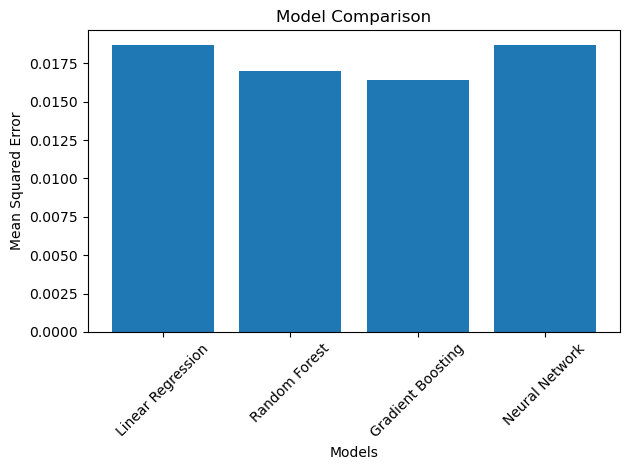

In [20]:
# Model Comparison Visualization
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']
mse_scores = [linear_mse, rf_mse, gb_mse, test_loss_nn]
plt.bar(models, mse_scores)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()